 Classify the email using the binary classification method. Email Spam detection has two states:
##a) Normal State – Not Spam, b) Abnormal State – Spam. 
##Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance
##Dataset link: The emails.csv dataset on the Kaggle
##https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv



##1)Preprocessing removing null values if any and Training testing split



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn import metrics
df=pd.read_csv("C:\\Users\\Owner\\Desktop\\Machine Learning BE\\Practical\\Practical Data Sets\\emails.csv")
df.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [2]:
df.shape

(5172, 3002)

In [3]:
df.columns



Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [4]:

##input data
X=df.drop(['Email No.','Prediction'],axis=1)
##output data
y = df['Prediction']


In [5]:
X.shape

(5172, 3000)

In [6]:
X.info
X.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [7]:

y.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

<Axes: xlabel='Prediction', ylabel='count'>

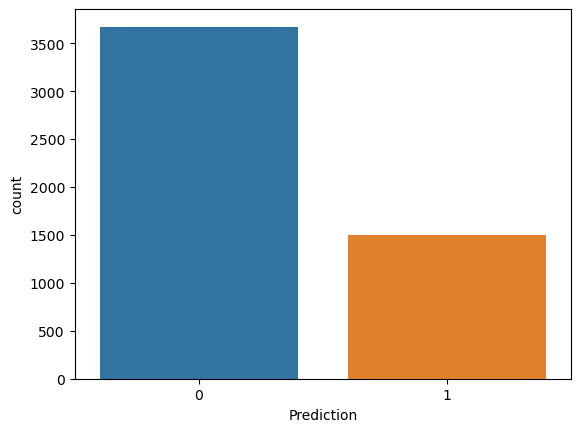

In [8]:
sns.countplot(x=y)

In [55]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [56]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [59]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [60]:
X_scaled.shape

(5172, 3000)

In [61]:
X_train.shape

(3879, 3000)

In [62]:
X_test.shape

(1293, 3000)

##2)Apply KNN Classifier

In [64]:
##import the class
from sklearn.neighbors import KNeighborsClassifier 
##create thee object
knn = KNeighborsClassifier(n_neighbors=7)

In [65]:
#Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [71]:
##predict on test data
y_pred = knn.predict(X_test)


In [80]:

print("Prediction",y_pred)
print("KNN accuracy = ",accuracy_score(y_test,y_pred))
print("Confusion matrix",metrics.confusion_matrix(y_test,y_pred))

Prediction [1 0 0 ... 1 0 1]
KNN accuracy =  0.848414539829853
Confusion matrix [[752 177]
 [ 19 345]]


In [83]:
##import the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report

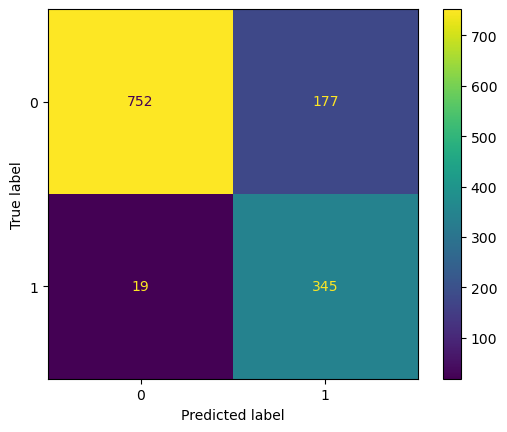

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [85]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [88]:
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88       929
           1       0.66      0.95      0.78       364

    accuracy                           0.85      1293
   macro avg       0.82      0.88      0.83      1293
weighted avg       0.89      0.85      0.85      1293



##3)Apply SVM Classifier


In [104]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(X_train, y_train)



SVC(kernel='sigmoid')

In [105]:
# predict
y_pred = svm.predict(X_test)
print("SVM accuracy = ",accuracy_score(y_test,y_pred))

SVM accuracy =  0.839907192575406


In [ ]:
#linear=0.9767981438515081
#rbf= 0.9450889404485692
#polynomial= 0.7548337200309359
#sigmoid =0.839907192575406